In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from feature_extraction import Featurizer
pd.set_option('display.max_columns', None)

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

drop_cols = ["Name", "Ticket", "Cabin", "Embarked", "PassengerId"]
featurizer = Featurizer(drop_cols)
train_df, val_df = featurizer.get_train_features(train_df)

In [4]:
train_df

,Survived,Sex,Age,SibSp,Parch,Fare,2,3
0,1,1,9.0,0,2,20.5250,0.0,1.0
1,0,0,9.0,4,2,31.2750,0.0,1.0
2,0,1,61.0,0,0,32.3208,0.0,0.0
3,0,1,NaN,0,0,7.7292,0.0,1.0
4,0,1,NaN,0,0,7.8958,0.0,1.0
...,...,...,...,...,...,...,...,...
796,1,0,21.0,0,0,7.6500,0.0,1.0
797,0,1,NaN,0,0,31.0000,0.0,0.0
798,0,1,41.0,2,0,14.1083,0.0,1.0
799,1,0,14.0,1,2,120.0000,0.0,0.0


In [5]:
train_df["Age"].isnull().mean()

0.20224719101123595

In [6]:
train_df.fillna({"Age": train_df["Age"].median()}, inplace=True)
val_df.fillna({"Age": train_df["Age"].median()}, inplace=True)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
model = LogisticRegression()
model.fit(train_df.drop("Survived", axis=1), train_df["Survived"])
y_pred = model.predict(train_df.drop("Survived", axis=1))

/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with d

In [9]:
accuracy_score(train_df["Survived"].values.squeeze(), y_pred.squeeze())

0.7965043695380774

In [10]:
y_pred = model.predict(val_df.drop("Survived", axis=1))
accuracy_score(val_df["Survived"].values.squeeze(), y_pred.squeeze())

/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8444444444444444

In [11]:
from typing import Callable, Dict, List, Tuple

class Model():
    def __init__(
        self, 
        y_col: str,
        model: Callable, 
        metrics:Dict[str, Tuple[str, Callable]]=accuracy_score,
                ) -> None:
        self.model = model
        self.metrics = metrics
        self.y_col = y_col
        
    def print_metric(self, 
                     metric:Callable, 
                     metric_name: str,
                     metric_y_type: str,
                     df:pd.DataFrame, 
                     data_type:str) -> None:
        y_class = self.model.predict(df.drop(self.y_col, axis=1))
        y_prob = self.model.predict_proba(df.drop(self.y_col, axis=1))
        if metric_y_type == "prob":
            y_pred= y_prob
        else:
            y_pred = y_class
        metric_val = metric(df[self.y_col].values.squeeze(), y_pred.squeeze())
        print(f"{data_type} {metric_name}: {metric_val:.4f}")
        
    def fit(self, train_df: pd.DataFrame, val_df: pd.DataFrame) -> None:
        self.model.fit(train_df.drop(self.y_col, axis=1), train_df[self.y_col])
        
        for name, (metric_y_type, metric) in self.metrics.items():
            self.print_metric(metric, name, metric_y_type, train_df, "Training")
            self.print_metric(metric, name, metric_y_type, val_df, "Validation")

In [12]:
metric_list = {"Accuracy": ("class", accuracy_score)}

In [13]:
logistic = LogisticRegression()
model = Model("Survived", logistic, metric_list)
model.fit(train_df, val_df)

Training Accuracy: 0.7965
Validation Accuracy: 0.8444


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with d

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, max_depth=3)
model = Model("Survived", random_forest, metric_list)
model.fit(train_df, val_df)

Training Accuracy: 0.8240
Validation Accuracy: 0.8000


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtype

In [15]:
from sklearn.gaussian_process import GaussianProcessClassifier

gp = GaussianProcessClassifier()
model = Model("Survived", gp, metric_list)
model.fit(train_df, val_df)

/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Training Accuracy: 0.9388


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Validation Accuracy: 0.7556


In [16]:
from sklearn import metrics

def auc(y, pred):
    fpr, tpr, _ = metrics.roc_curve(y, pred[:, 1])
    return metrics.auc(fpr, tpr)

In [17]:
metric_list["AUC"] = ("prob", auc)

In [18]:
for model_ in [logistic, random_forest, gp]:
    model = Model("Survived", model_, metric_list)
    model.fit(train_df, val_df)
    print("="*30)

/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with d

Training Accuracy: 0.7965
Validation Accuracy: 0.8444
Training AUC: 0.8474
Validation AUC: 0.9151
Training Accuracy: 0.8240
Validation Accuracy: 0.7889
Training AUC: 0.8773
Validation AUC: 0.8958


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Training Accuracy: 0.9388


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Validation Accuracy: 0.7556


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Training AUC: 0.9430


/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/furkanpc/anaconda3/envs/ml_udemy/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Validation AUC: 0.7706


In [19]:
train_df = pd.read_csv("./train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train_df.dropna(subset=["Pclass", "Age"]).groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

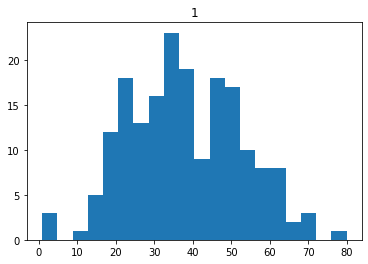

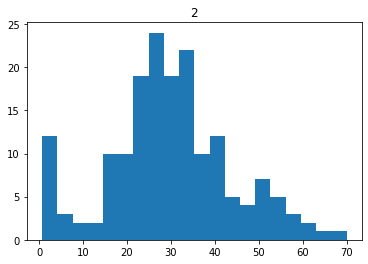

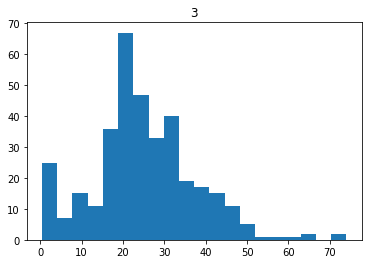

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

grps = train_df.dropna(subset=["Pclass", "Age"]).groupby("Pclass")
for name, grp in grps:
    plt.hist(grp["Age"], bins=20)
    plt.title(name)
    plt.show()